In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Q1
For each of the 400 movies, use a simple linear regression model to predict the ratings.
Use the ratings of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have to build 399 models for each of the 400 movies).
For each of the 400 movies, find the movie that predicts ratings the best. Then report the average COD of those 400 simple linear regression models.
Please include a histogram of these 400 COD values and a table with the 10 movies that are most easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict from the ratings of a single other movie (and their associated COD values, as well as which movie ratings are the best predictor, so this table should have 3 columns).

In [2]:
# Load imputed dataset
data = pd.read_csv('movieReplicationSet_replacednan.csv')

# The first 400 columns are movie ratings
movie_ratings = data.iloc[:, :400]

FileNotFoundError: ignored

In [ ]:
'''Find the best predictor and the avg cod'''
best_r2 = -1
best_predictor = None

# Iterate over each potential predictor movie
for predictor_movie in movie_ratings.columns:
    sum_cod = 0

    # Iterate over each movie to build models (399 models)
    for target_movie in movie_ratings.columns:
        if predictor_movie != target_movie:
            # Prepare the data
            X = movie_ratings[[predictor_movie]]
            y = movie_ratings[target_movie]

            # Build and fit the model
            model = LinearRegression().fit(X, y)

            # Predict and evaluate (higher r^2 means better predictor)
            y_pred = model.predict(X)
            r2 = r2_score(y, y_pred)

            # Calculate sum of cod values
            sum_cod += r2

    # Calculate avg of cod values
    avg_cod = sum_cod / 399

    # Check if this predictor is better
    if avg_cod > best_r2:
        best_r2 = avg_cod
        best_predictor = predictor_movie

print(best_predictor)
print(best_r2)

Escape from LA (1996)
0.27580464104000696


                                  Target Movie       COD
0                The Life of David Gale (2003)  0.367221
1                        Wing Commander (1999)  0.374155
2                      Django Unchained (2012)  0.108049
3                                 Alien (1979)  0.165634
4    Indiana Jones and the Last Crusade (1989)  0.115025
..                                         ...       ...
394                              Patton (1970)  0.527871
395                            Anaconda (1997)  0.166763
396                             Twister (1996)  0.309883
397                           MacArthur (1977)  0.493597
398                  Look Who's Talking (1989)  0.289622

[399 rows x 2 columns]


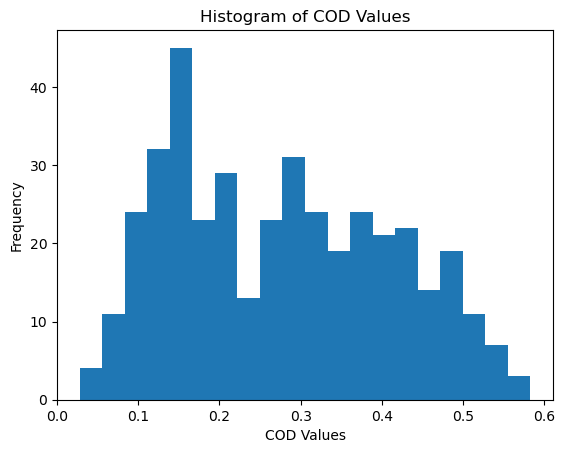

In [ ]:
'''Histogram of these 400 COD values'''
# Initialize lists to store
cod_values = []
results_values = []

for target_movie in movie_ratings.columns:
        if best_predictor != target_movie:
             # Prepare the data
            X = movie_ratings[[best_predictor]]
            y = movie_ratings[target_movie]

            # Build and fit the model
            model = LinearRegression().fit(X, y)

            # Predict and evaluate
            y_pred = model.predict(X)
            r2 = r2_score(y, y_pred)

            results_values.append((target_movie, r2))
            cod_values.append(r2)

# Convert results to DataFrame
results_df = pd.DataFrame(results_values, columns=['Target Movie', 'COD'])
print(results_df)


# Create histogram of COD values
plt.hist(cod_values, bins=20)
plt.xlabel('COD Values')
plt.ylabel('Frequency')
plt.title('Histogram of COD Values')
plt.show()

In [ ]:
'''Find the 10 most and least predictable movies'''
# Initialize lists to store results
best_predictors = []

# Iterate over each movie to build models
for target_movie in movie_ratings.columns:
    best_r2 = -1
    best_predictor2 = None
    sum_r2 = 0

    # Iterate over each potential predictor movie
    for predictor_movie in movie_ratings.columns:
        if predictor_movie != target_movie:
            # Prepare the data
            X = movie_ratings[[predictor_movie]]
            y = movie_ratings[target_movie]

            # Build and fit the model
            model = LinearRegression().fit(X, y)

            # Predict and evaluate
            y_pred = model.predict(X)
            r2 = r2_score(y, y_pred)

            # Calculate the sum of the cod
            sum_r2 += r2

            # Check if this model is better
            if r2 > best_r2:
                best_r2 = r2
                best_predictor2 = predictor_movie

    # Caluculate the avg of the cod
    avg_r2 = sum_r2 / 399
    best_predictors.append((target_movie, best_predictor2, avg_r2))


# Convert results to DataFrame
results_df = pd.DataFrame(best_predictors, columns=['Target Movie', 'Best Predictor', 'Avg COD'])


# Prepare the table for 10 most and least predictable movies
most_predictable = results_df.nlargest(10, 'Avg COD')
least_predictable = results_df.nsmallest(10, 'Avg COD')

# Output the tables
print(most_predictable)
print(least_predictable)

                  Target Movie             Best Predictor   Avg COD
116      Escape from LA (1996)          Sexy Beast (2000)  0.275805
109          Sexy Beast (2000)       The Silencers (1966)  0.275465
203     Erik the Viking (1989)                I.Q. (1994)  0.270332
377         The Lookout (2007)              Patton (1970)  0.270039
298        Crimson Tide (1995)  The Straight Story (1999)  0.264140
287  The Straight Story (1999)               Congo (1995)  0.262151
395              Patton (1970)         The Lookout (2007)  0.259828
208                I.Q. (1994)     Erik the Viking (1989)  0.258832
363   Miller's Crossing (1990)         The Lookout (2007)  0.258777
240          The Bandit (1996)     Best Laid Plans (1999)  0.258698
                                          Target Movie  \
80                                       Avatar (2009)   
84                                The Conjuring (2013)   
95                                 Interstellar (2014)   
9                   

### Q2
For the 10 movies that are best and least well predicted from the ratings of a single other movie (so 20 in total), build multiple regression models that include gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) as additional predictors (in addition to the best predicting movie from question 1).
Comment on how R^2 has changed relative to the answers in question 1.
Please include a figure with a scatterplot where the old COD (for the simple linear regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple regression models) is on the y-axis.

In [ ]:
# Disect the best and least well predicted movies from Q1
selected_movies = pd.concat([most_predictable, least_predictable])
selected_movies_list = selected_movies['Target Movie'].tolist()
selected_movies_ratings = movie_ratings[selected_movies_list]

In [ ]:
'''Old COD by simple linear regression'''

# Initialize lists to store old R² values
old_r2_values = []

# Iterate over the selected movies
for movie in selected_movies_ratings.columns:
     # Prepare the data
    X = movie_ratings[[best_predictor]]
    y = selected_movies_ratings[movie]

    # Build and fit the model
    model = LinearRegression().fit(X, y)

    # Predict and evaluate
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    old_r2_values.append(r2)

# Add new R² values to the selected_movies DataFrame
selected_movies['Old R2'] = old_r2_values

In [ ]:
old_r2_values

[1.0,
 0.5829345452012662,
 0.5645401819920411,
 0.5199998823321124,
 0.4777175426000766,
 0.4794959412887355,
 0.5278709574305425,
 0.4752625325552301,
 0.5299465299865957,
 0.45029783570810533,
 0.027710841696751753,
 0.03468711539841507,
 0.053364955759502286,
 0.06065506920915276,
 0.06420648797390782,
 0.05114327822361009,
 0.07190114179837537,
 0.07376834321538128,
 0.061136884494790156,
 0.08466801323829798]

In [ ]:
'''New COD by multiple regression'''

# Additional predictors: Gender identity, sibship status, and social viewing preferences
additional_predictors = data.iloc[:, 474:477]

# Initialize lists to store new R² values
new_r2_values = []

# Iterate over the selected movies
for movie in selected_movies_ratings.columns:

    # Prepare the data
    X = pd.concat([movie_ratings[[best_predictor]], additional_predictors], axis=1)
    y = selected_movies_ratings[movie]

    # Build and fit the model
    model = LinearRegression().fit(X, y)

    # Predict and evaluate
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    new_r2_values.append(r2)

# Add new R² values to the selected_movies DataFrame
selected_movies['New R2'] = new_r2_values

In [ ]:
new_r2_values

[1.0,
 0.5834613990411619,
 0.5688929062643711,
 0.5223483802247337,
 0.4807403147262427,
 0.48732109136098123,
 0.5294172611277672,
 0.477772217090484,
 0.5306413008269096,
 0.45827036000536847,
 0.030307686633357367,
 0.04273314347205748,
 0.057692638448237576,
 0.06224858714829806,
 0.08138935898309063,
 0.06453896795372538,
 0.07766167442973115,
 0.07899651657064999,
 0.06823212671238787,
 0.09130941124608682]

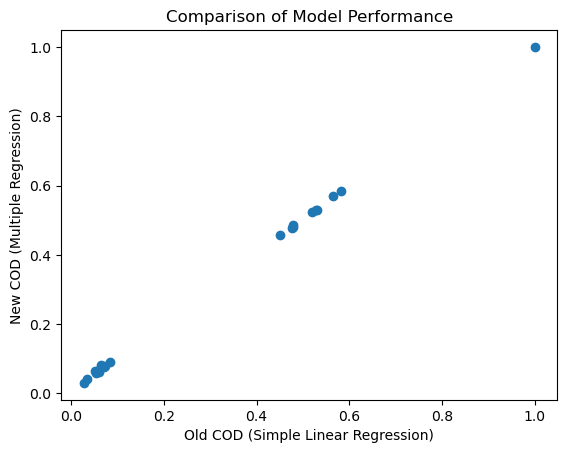

In [ ]:
# Create scatterplot
plt.scatter(selected_movies['Old R2'], selected_movies['New R2'])
plt.xlabel('Old COD (Simple Linear Regression)')
plt.ylabel('New COD (Multiple Regression)')
plt.title('Comparison of Model Performance')
plt.show()